In [78]:
import squidpy as sq
import scanpy as sc
import scipy as scp
import numpy as np 
import pandas as pd

In [79]:
hlca = 'hlca/hlcaFull.h5ad'
hlcadroplet = 'droplet_normal_lung_blood_scanpy.20200205.RC4.h5ad'

adata = sc.read_h5ad(hlca, backed='r')

In [80]:
adata.obs

,suspension_type,donor_id,is_primary_data,assay_ontology_term_id,cell_type_ontology_term_id,development_stage_ontology_term_id,disease_ontology_term_id,self_reported_ethnicity_ontology_term_id,tissue_ontology_term_id,organism_ontology_term_id,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
CGATGTAAGTTACGGG_SC10,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0009899,CL:0000583,HsapDv:0000149,PATO:0000461,HANCESTRO:0008,UBERON:0008946,NCBITaxon:9606,...,tissue,alveolar macrophage,10x 3' v2,normal,Homo sapiens,male,lung parenchyma,Asian,55-year-old human stage,LL;0n*@mx8
cc05p_CATGCCTGTGTGCCTG_carraro_csmc,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0009899,CL:0000003,unknown,PATO:0000461,unknown,UBERON:0002048,NCBITaxon:9606,...,tissue,native cell,10x 3' v2,normal,Homo sapiens,unknown,lung,unknown,unknown,)rNf~Q0&BX
ATTCTACCAAGGTTCT_HD68,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0011025,CL:0002144,HsapDv:0000135,PATO:0000461,HANCESTRO:0005,UBERON:0008946,NCBITaxon:9606,...,tissue,capillary endothelial cell,10x 5' v1,normal,Homo sapiens,male,lung parenchyma,European,41-year-old human stage,5%kv|ie@!5
D062_TGACCCTTCAAACCCA-sub_wang_sub_batch3,nucleus,homosapiens_None_2023_None_sikkemalisa_002_d10...,False,EFO:0009922,CL:4028004,HsapDv:0000082,PATO:0000461,unknown,UBERON:0002048,NCBITaxon:9606,...,tissue,alveolar type 1 fibroblast cell,10x 3' v3,normal,Homo sapiens,male,lung,unknown,newborn human stage,Jq?*-$kHDp
muc9826_GTCGTGAGAGGA_mayr,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0008722,CL:0002145,HsapDv:0000151,MONDO:0002771,unknown,UBERON:0002048,NCBITaxon:9606,...,tissue,ciliated columnar cell of tracheobronchial tree,Drop-seq,pulmonary fibrosis,Homo sapiens,male,lung,unknown,57-year-old human stage,m35M8pyQm_
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTGGATCGTTCCTG_5-PX5-sub_mould,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0009922,CL:0000583,unknown,PATO:0000461,unknown,UBERON:0002048,NCBITaxon:9606,...,tissue,alveolar macrophage,10x 3' v3,normal,Homo sapiens,unknown,lung,unknown,unknown,1Y~Wo08=%L
TCAGGATCAAGACGTG_F02526,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0011025,CL:0002145,HsapDv:0000149,PATO:0000461,HANCESTRO:0010,UBERON:0008946,NCBITaxon:9606,...,tissue,ciliated columnar cell of tracheobronchial tree,10x 5' v1,normal,Homo sapiens,male,lung parenchyma,African,55-year-old human stage,APnAX3m%#T
CAACCTCTCATGTAGC-WSSS8015042-0_meyer_unpubl,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,False,EFO:0011025,CL:0000583,HsapDv:0000158,PATO:0000461,HANCESTRO:0005,UBERON:0002048,NCBITaxon:9606,...,tissue,alveolar macrophage,10x 5' v1,normal,Homo sapiens,male,lung,European,64-year-old human stage,5~yXPx7fAJ
022C-b_GGATGTTTCCAAGTAC_adams,cell,homosapiens_None_2023_None_sikkemalisa_002_d10...,True,EFO:0009899,CL:0000003,unknown,PATO:0000461,unknown,UBERON:0002048,NCBITaxon:9606,...,tissue,native cell,10x 3' v2,normal,Homo sapiens,unknown,lung,unknown,unknown,tC2CvbkoUD


In [119]:
def metadata_filter(adata, obs_or_var, col_name, value):
    '''
    Function to quickly filter and subset the dataset based on metadata.
    
    Parameters:
        adata (AnnData): Annotated data object.
        obs_or_var (str): 'obs' for filtering based on observations metadata, 'var' for filtering based on variables metadata.
        col_name (str): Name of the metadata column to filter by.
        value: Value to filter for in the specified column.
    
    Returns:
        AnnData: Subset of the original AnnData object based on the specified metadata filter.
    '''
    if obs_or_var not in ['obs', 'var']:
        raise ValueError("Parameter 'obs_or_var' must be either 'obs' or 'var'.")

    if obs_or_var == 'obs':
        return adata[adata.obs[col_name] == value, :]
    else:
        return adata[adata.var[col_name] == value, :]

# def writeToh5ad(annDataOb)
    

sclc_cells = metadata_filter('obs', 'disease', 'squamous cell lung carcinoma') # squamous cell lung carcinoma cells
# normal_cells = metadata_filter('o0bs', 'disease', 'normal') # normal cells

TypeError: metadata_filter() missing 1 required positional argument: 'value'

In [112]:
sclc_cells
normal_cells

View of AnnData object with n_obs × n_vars = 1305099 × 56295 backed at 'hlca/hlcaFull.h5ad'
    obs: 'suspension_type', 'donor_id', 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'cause_of_death', 'core_or_extension', 'dataset', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'smoking_status', 'study', 'subjec

In [44]:
# Access metadata for cells (obs)
cell_metadata = adata.obs

# Define your filtering criteria
sclc_cells = cell_metadata['disease'] == 'squamous cell lung carcinoma'
normal_cells = cell_metadata['disease'] == 'normal'

# Filter cells based on the criteria
sclc_cells = adata[filter_criteria].to_memory()


In [32]:
ct_mtx = sclc_cells

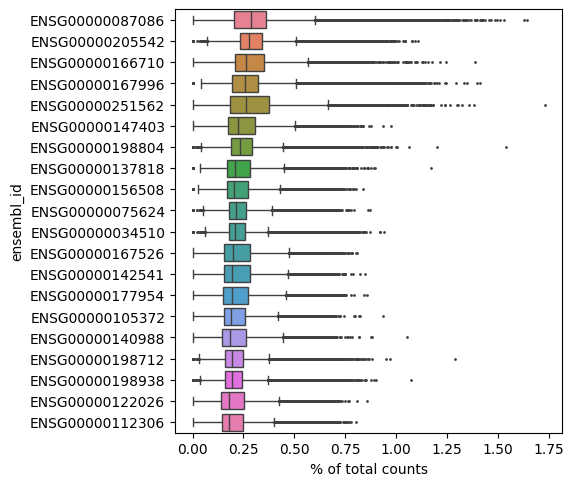

In [42]:
sc.pl.highest_expr_genes(filtered_cells.to_memory(), n_top=20, )